In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Uploading the data

In [2]:
sea_df = pd.read_csv('epa-sea-level.csv')

In [3]:
sea_df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
sea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [6]:
sea_df.shape

(134, 5)

In [7]:
for col in sea_df.columns:
  print(col)

Year
CSIRO Adjusted Sea Level
Lower Error Bound
Upper Error Bound
NOAA Adjusted Sea Level


## Column Descriptions 

### <font color='green'> 1- CSIRO Adjusted Sea Level</font>

> <font color='blue'> The CSIRO (Commonwealth Scientific and Industrial Research Organisation) Adjusted Sea Level is a metric that refers to the measurement of changes in sea levels over time. It takes into account various factors such as tides, atmospheric pressure, and ocean currents to provide a more accurate understanding of sea level rise or fall. This adjusted measurement helps scientists and researchers better analyze long-term trends and patterns in sea level changes. </font>

### <font color='green'> 2- Lower/Upper Error Bound</font>

> <font color='blue'> The Lower Error Bound and Upper Error Bound are both terms used to describe the range within which a measurement or estimation is considered to be accurate. </font>

> <font color='brown'> - The Lower Error Bound represents the lower limit or minimum value of the range, taking into account potential errors or uncertainties associated with the data. It provides a conservative estimate or boundary for the measurement or estimation. </font>

> <font color='blue'> By using both the Lower Error Bound and Upper Error Bound, scientists and researchers can define a range within which they believe the true value of the measurement or estimation lies. This helps quantify the uncertainty in the data and provides a more accurate representation of the measurement or estimation. </font>

### <font color='green'> 3- NOAA Adjusted Sea Level</font>

> <font color='blue'> NOAA Adjusted Sea Level refers to the measurement and analysis of sea level changes that has been adjusted by the National Oceanic and Atmospheric Administration (NOAA). NOAA is a scientific agency within the United States Department of Commerce that focuses on the conditions of the oceans and atmosphere. </font>

> <font color='blue'> NOAA Adjusted Sea Level data is widely used by scientists, policymakers, and researchers to study long-term trends, monitor coastal areas, and assess the potential impacts of climate change. It provides valuable insights into how sea levels are changing and helps inform decisions related to coastal planning, infrastructure development, and environmental management. </font>

### <font color='green'> Note: between the two adjusted sea levels </font>

> <font color='blue'> The difference between NOAA Adjusted Sea Level and CSIRO Adjusted Sea Level lies in the organizations that produce and maintain the respective measurements, as well as the specific methodologies used. </font>

> <font color='browm'> - CSIRO's measurements also rely on satellite data and tide gauges, but they use different adjustment methodologies compared to NOAA. CSIRO's adjustments take into account factors such as vertical land motion, ocean dynamics, and atmospheric pressure variations. </font>

> <font color='brown'> - NOAA's measurements are based on a combination of satellite data, tide gauges, and other observational records. They apply adjustments to account for factors such as vertical land movement and instrumental biases </font>

In [8]:
sea_df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


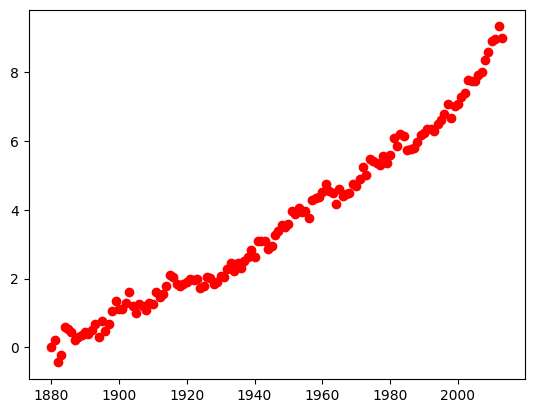

In [9]:
# Create scatter plot

plt.scatter(sea_df.Year, sea_df['CSIRO Adjusted Sea Level'], color='red')
plt.show()

### <font color='green'> The First Line of Best Fit </font>

In [10]:
resultedLine1 = linregress(sea_df['Year'], sea_df['CSIRO Adjusted Sea Level'])

In [11]:
firLineSlope = resultedLine1.slope
firLineIntercept = resultedLine1.intercept
firLinePvlue = resultedLine1.pvalue
firLinePearsonCorCoef = resultedLine1.rvalue
firLineStandardErrorofEstimatedSlope = resultedLine1.stderr
firLineStandardErrofEstimIntercept = resultedLine1.intercept_stderr


In [13]:
print(
    '\n',
    f"Slope = {firLineSlope}", '\n',
    f"Intercept = {firLineIntercept}", '\n',
    f"the P value = {firLinePvlue}", '\n',
    f"Pearson correlation coef or r = {firLinePearsonCorCoef}", '\n',
    f"Standard Error of Estimated Slope = {firLineStandardErrorofEstimatedSlope}", '\n',
    f"Standard Error of Estimated Intercept = {firLineStandardErrofEstimIntercept}"
)


 Slope = 0.0630445840121348 
 Intercept = -119.06594196773978 
 the P value = 3.788696979113155e-102 
 Pearson correlation coef or r = 0.984757131182585 
 Standard Error of Estimated Slope = 0.000969211871328715 
 Standard Error of Estimated Intercept = 1.8869433812425225


In [16]:
xLine1 = np.arange(sea_df.Year.min(), 2050, 1)
yLine1 = xLine1*firLineSlope + firLineIntercept

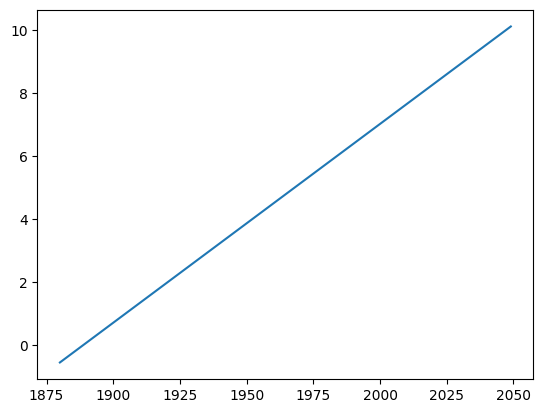

In [17]:
plt.plot(xLine1, yLine1)

### <font color='green'> The Second Line of Best Fit </font>

In [21]:
xLine1 = np.arange(sea_df.Year.min(), 2050, 1)
yLine1 = xLine1*firLineSlope + firLineIntercept

#From the year 2000 to the most recent year in the dataset
sea2000df = sea_df[sea_df['Year'] >= 2000]

resultedLine2 = linregress(sea2000df['Year'], sea2000df['CSIRO Adjusted Sea Level'])

In [23]:
SecLineSlope = resultedLine2.slope
SecLineIntercept = resultedLine2.intercept
SecLinePvlue = resultedLine2.pvalue
SecLinePearsonCorCoef = resultedLine2.rvalue
SecLineStandardErrorofEstimatedSlope = resultedLine2.stderr
SecLineStandardErrofEstimIntercept = resultedLine2.intercept_stderr

In [24]:
xLine2 = np.arange(2000, 2050, 1)
yLine2 = xLine2*SecLineSlope + SecLineIntercept

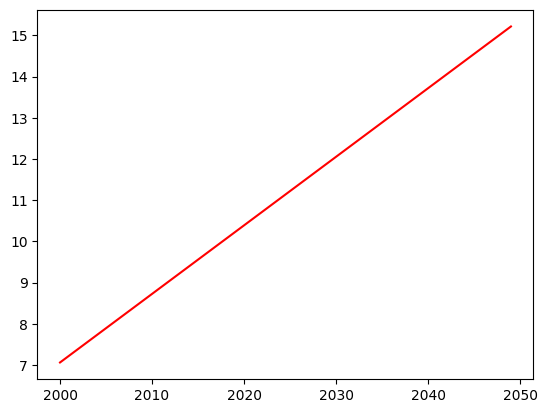

In [25]:
plt.plot(xLine2, yLine2, color='red')

In [32]:
# plt.xlabel('Year')
# plt.ylabel('Sea Level (inches)')
# plt.title('Rise in Sea Level')
# plt.show

## <font color='green'> The Function Showing Both Lines </font>

In [30]:
def Draw_Plot():
  #load data set
  sea_df = pd.read_csv('epa-sea-level.csv')
  #Scatter Plot
  plt.scatter(sea_df.Year, sea_df['CSIRO Adjusted Sea Level'], s=10)
  #1st line of best fit
  resultedLine1 = linregress(sea_df['Year'], sea_df['CSIRO Adjusted Sea Level'])
  firLineSlope = resultedLine1.slope
  firLineIntercept = resultedLine1.intercept
  xLine1 = np.arange(sea_df.Year.min(), 2050, 1)
  yLine1 = xLine1*firLineSlope + firLineIntercept
  plt.plot(xLine1, yLine1, color='green')
  #2nd Line of best fit
  sea2000df = sea_df[sea_df['Year'] >= 2000]
  resultedLine2 = linregress(sea2000df['Year'], sea2000df['CSIRO Adjusted Sea Level'])
  SecLineSlope = resultedLine2.slope
  SecLineIntercept = resultedLine2.intercept
  xLine2 = np.arange(2000, 2050, 1)
  yLine2 = xLine2*SecLineSlope + SecLineIntercept
  plt.plot(xLine2, yLine2, color='red')
  plt.xlabel('Year')
  plt.ylabel('Sea Level (inches)')
  plt.title('Rise in Sea Level')
  plt.savefig('sea_level_plot.png')
  return plt.gca()

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

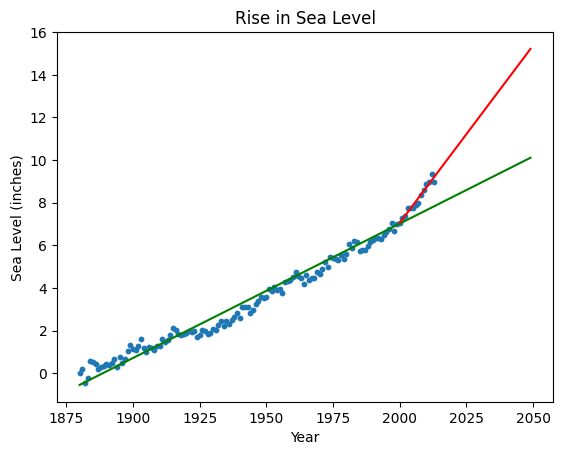

In [31]:
Draw_Plot()